## Introduction 
The Data set I analyzed is **Titanic Data**.  
At first we need understand data, then ask question.  
We can find the descriptions of this csv file.  
These are definitions of variables.

    VARIABLE DESCRIPTIONS:
    survival        Survival
                    (0 = No; 1 = Yes)
    pclass          Passenger Class
                    (1 = 1st; 2 = 2nd; 3 = 3rd)
    name            Name
    sex             Sex
    age             Age
    sibsp           Number of Siblings/Spouses Aboard
    parch           Number of Parents/Children Aboard
    ticket          Ticket Number
    fare            Passenger Fare
    cabin           Cabin
    embarked        Port of Embarkation
                    (C = Cherbourg; Q = Queenstown; S = Southampton)


## Ask Question
Then we can ask questions.  
As kaggle suggested some groups of people more likely to survive, like **children, women, and the upper-class.**  
So I will ask, **Is these factors really relate to the survive rate?**  
**Add: Do different Sex in same class have different survive rate ?** 
**Or same Sex have different survive rate in different class?**

And more, when I seach the structure and cabins' location of titanic online,  
I find the factor of cabin may also connect to the survive rate,  
such as some cabins is far from boat deck,and living with crowd of people.  
Therefore, I will ask, ~~**Will people living in different cabin have different survive rate?**~~  
**Revise: What is connection between fare and survive rate?**

Let's wrangle data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

# Get a glimpse of data
titanic_df = pd.read_csv('../input/train.csv')
titanic_df.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check the information of our data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Revision Question
As we see, unfortunately, there are too few data about the cabins.  
And some of them even have several cabins' name in it.
We need change question, or consider a way to solve it.  

At first, I try to solve it.  
As different class people will live in the different area and different room. Like [there](http://www.dummies.com/education/history/titanic-facts-the-layout-of-the-ship/) said.  
And for different class, the ticket price is also [differernt](http://www.dummies.com/education/history/suites-and-cabins-for-passengers-on-the-titanic/), like 3-8 pounds for 3rd class and 12 pounds for 2nd class.  
So, I come up with an idea. Can we guess their room from their ticket price?  
However, when search information about coordinate room for different classes,  
I find in some floor's room, like D, E, and F floor, is hard to determine which class lives here.  
But for 1st class, they mainly live from A to E, 2nd class D to F, and 3rd class F to G.

Therefore, people with different fare will live in different area.  
I change my Question to **What is connection between fare and survive rate?**

Also, We can find only 714 age data here, so we need considerate a way deal with it.  
Like we can fill them with random number in a particular range, or we can try some other ways.

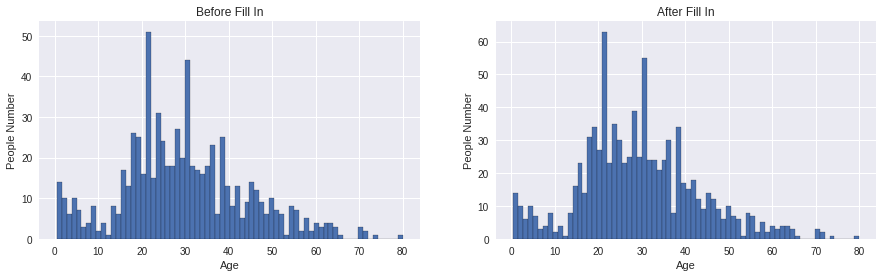

In [3]:
#Af first fill lost data, fill age data 

# Get avarage, std to calculate the limitaton of random number
# Get NAN number to determine how many data need to generate
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# Plot original age data
titanic_df['Age'].dropna().hist(bins=70, ax=axis1, ls='solid', lw=0.2, ec='black')

average_age = titanic_df.Age.mean()
std_age = titanic_df.Age.std()
nan_age_number = titanic_df.Age.isnull().sum()

# Generate 
rand_age = np.random.randint(average_age - std_age, average_age + std_age, 
                             size = nan_age_number)
# Fill in 
titanic_df.loc[np.isnan(titanic_df['Age']), 'Age'] = rand_age

# Plot result
titanic_df['Age'].hist(bins=70, ax=axis2, ls='solid', lw=0.2, ec='black')
axis1.set_title('Before Fill In')
axis1.set_xlabel('Age')
axis1.set_ylabel('People Number')
axis2.set_title('After Fill In')
axis2.set_xlabel('Age')
axis2.set_ylabel('People Number')

In [4]:
# At first drop data it seems useless for this analysis
# they are ID, name, ticket number, embark place, cabin, SibSp, and Parch
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket','Embarked','Cabin','SibSp','Parch'],axis = 1)
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
# At first let's analyse from sex and age view
# Divide children from male and female type
titanic_df.loc[titanic_df['Age'] <= 16, 'Sex'] = 'child'
titanic_df = titanic_df.drop(['Age'],axis=1)
titanic_df.head()


,Survived,Pclass,Sex,Fare
0,0,3,male,7.2500
1,1,1,female,71.2833
2,1,3,female,7.9250
3,1,1,female,53.1000
4,0,3,male,8.0500


In [6]:
# Give mroe descriptive labels for Survived and Pclass
titanic_df['Survival'] = titanic_df.Survived.map({0:'Died',1:'Survived'})
titanic_df['Class'] = titanic_df.Pclass.map({1:'1st Class',2:'2nd Class',3:'3rd Class'})

# Child and not child
titanic_df['Child'] = titanic_df.Sex.map({'child':'Is Child','female':'Not Child','male':'Not Child'})
titanic_df.head()

,Survived,Pclass,Sex,Fare,Survival,Class,Child
0,0,3,male,7.2500,Died,3rd Class,Not Child
1,1,1,female,71.2833,Survived,1st Class,Not Child
2,1,3,female,7.9250,Survived,3rd Class,Not Child
3,1,1,female,53.1000,Survived,1st Class,Not Child
4,0,3,male,8.0500,Died,3rd Class,Not Child


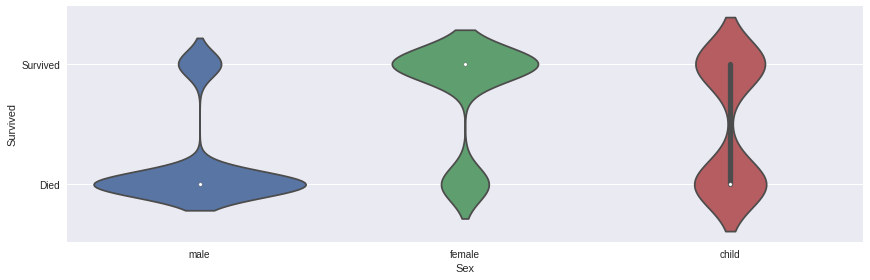

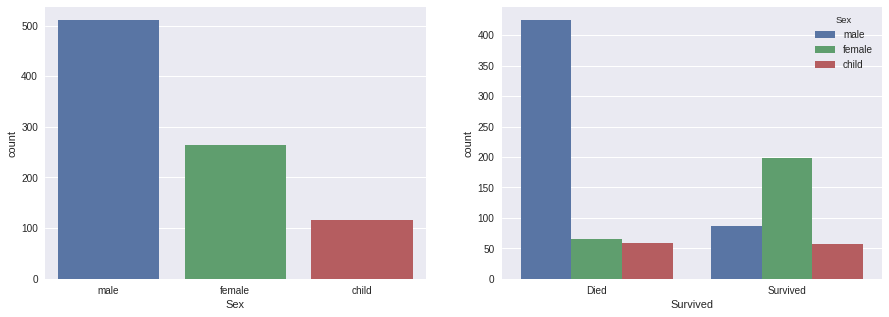

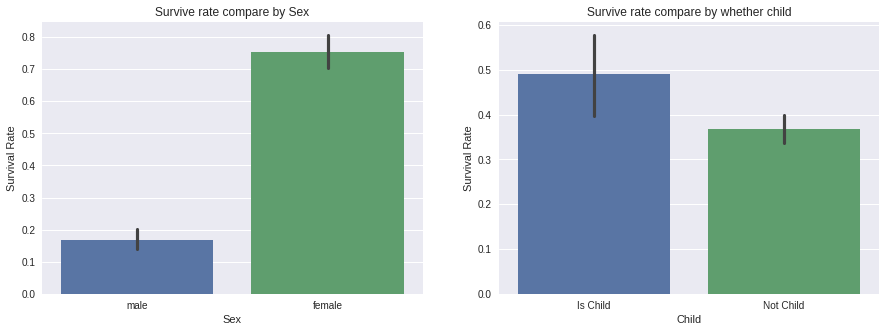

In [7]:
# Draw pictures to see more clearly of the relations
# about sex and age factor

sns.factorplot(data=titanic_df,x='Sex',y='Survived',kind="violin",size=4,aspect=3)
plt.yticks([0,1], ['Died', 'Survived'])

# Plot basic information about sex and age
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=titanic_df, x='Sex',ax=axis1)
sns.countplot(data=titanic_df,x='Survived',hue='Sex',order=[0,1],ax=axis2)
plt.xticks([0,1], ['Died', 'Survived'])

fig, (axis3,axis4) = plt.subplots(1,2,figsize=(15,5))
# Group data by sex and whether child
sex_survi_groups = titanic_df[['Sex','Survived']].groupby(['Sex'],as_index=True)

#Divide into three groups
men_group = sex_survi_groups.get_group('male')
women_group = sex_survi_groups.get_group('female')
children_group = sex_survi_groups.get_group('child')

# Plot survive rate between different sex
sns.barplot(data=titanic_df[['Sex','Survived']],x='Sex',y='Survived',order=['male','female'],ax=axis3)
axis3.set_ylabel("Survival Rate")

# Draw Child and Non-Child plot
sns.barplot(data=titanic_df[['Child', 'Survived']],x='Child',y='Survived',order=['Is Child','Not Child'],ax=axis4)
axis4.set_ylabel("Survival Rate")

axis3.set_title('Survive rate compare by Sex')
axis4.set_title('Survive rate compare by whether child')

In [8]:
# Statistic Hypothesis Test
# Chi-Square Test for Independence
# State the hypothesis: H0: Gender and survival rate are independent
from scipy.stats import chi2_contingency

men_women_group = pd.concat([men_group, women_group])
gender_pivot = pd.pivot_table(data=men_women_group[['Survived','Sex']],index='Survived',columns=['Sex'],
                      aggfunc=len)
chi2, p_value, dof, expected = chi2_contingency(gender_pivot)
print("Results of Chi-Squared test on Sex to Survival.")
print("Chi-Square Score = %s"%str(chi2))
print("Pvalue = %s\n"%str(p_value))

Results of Chi-Squared test on Sex to Survival.
Chi-Square Score = 254.128515913
Pvalue = 3.26899925825e-57



In [9]:
# Test for child and non-child
child_pivot = pd.pivot_table(data=titanic_df[['Survived','Child']],index='Survived',columns=['Child'],
                      aggfunc=len)
chi2, p_value, dof, expected = chi2_contingency(child_pivot)
print("Results of Chi-Squared test on Child to Survival.")
print("Chi-Square Score = %s"%str(chi2))
print("Pvalue = %s\n"%str(p_value))

Results of Chi-Squared test on Child to Survival.
Chi-Square Score = 6.00907600694
Pvalue = 0.0142324783182



## Analyze above test about Sex and Children
We can see that for men and women Chi-Square Score is a large number, and p value is very small, even far small than 0.01.
Therefore we can confidently reject our null hypothesis to say **Gender and survival rate is related**.  

For child and non-child, even it is not significant than sex.
We can still say we have 99% confident say **whether child or not relate to survival rate**, as small pvalue.

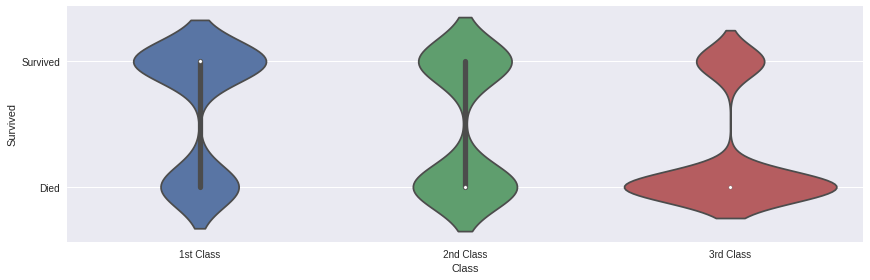

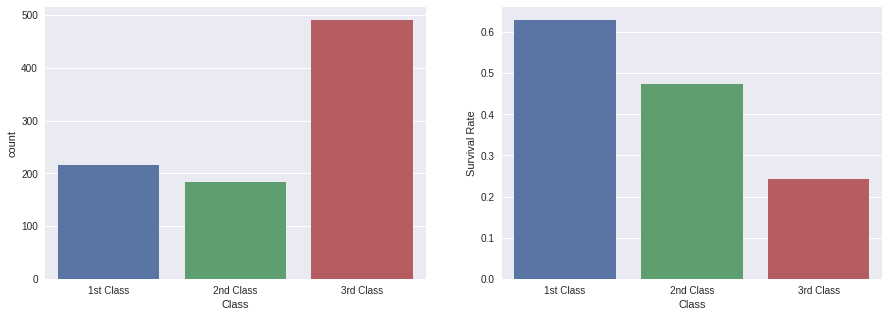

In [10]:
# Then let's analyze class factor
sns.factorplot(data=titanic_df,x='Class',y='Survived',kind="violin", \
               order=['1st Class','2nd Class','3rd Class'],size=4,aspect=3)
plt.yticks([0,1],['Died','Survived'])

# Group by class and take mean
class_survi_prec = titanic_df[['Class','Survived']].groupby(['Class'],as_index=False).mean()

# Compare number and survived rate between three classes
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=titanic_df, x='Class',order=['1st Class','2nd Class','3rd Class'],ax=axis1)
sns.barplot(data=class_survi_prec,x='Class',y='Survived', \
            order=['1st Class','2nd Class','3rd Class'],ax=axis2)
axis2.set_ylabel('Survival Rate')

In [11]:
# Statistic Hypothesis Test:
# H0: Class and Survival rate are independent
class_pivot = pd.pivot_table(data=titanic_df[['Survived','Class']],index='Survived',columns=['Class'],
                            aggfunc=len)
chi2, p_value, dof, expected = chi2_contingency(class_pivot)
print("Results of Chi-Squared test on Class to Survival.")
print("Chi-Square Score = %s"%str(chi2))
print("Pvalue = %s\n"%str(p_value))

Results of Chi-Squared test on Class to Survival.
Chi-Square Score = 102.888988757
Pvalue = 4.5492517113e-23



## Analyze above test about Pclass
At first we can see from graphs that there are actually some difference between three classes.  
1st class have highest survive rates, 2nd class follow, and then 3rd class.  
Especially, 3rd class is very different from the upper two classes.  
**3rd class has much lower survive rate than other classes.**  

To confirm this observation, we carry on some tests.
At first carry on Chi-Square Test on these three classes, we have a high Chi-Square score and a very low p-value.
So we can confidently reject its H0, and say **Class actually relate to survive rates**.

We can conclude that **Class actually affect survive rate, particularly between upper two classes and Class 3**.

([<matplotlib.axis.XTick at 0x7f72657e1898>,
 <a list of 2 Text xticklabel objects>)

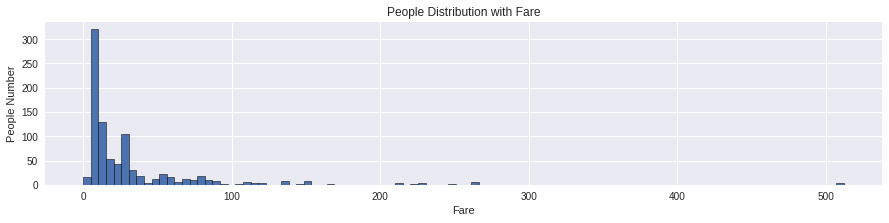

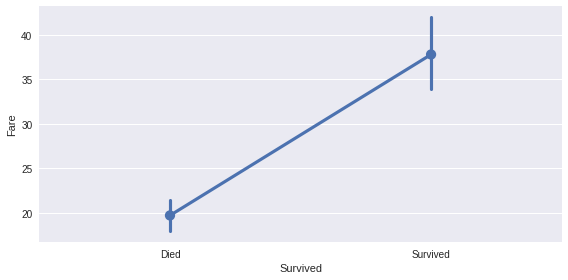

In [12]:
# Last let's analyze fare factor

# Try to plot on a logarithmic x-axis as comment suggests, but it not looks so good 
# fig = titanic_df['Fare'].plot(kind='hist', figsize=(15,3), bins=100, logx=True, 
#                               ls='solid', lw=1, ec='black')

fig = titanic_df['Fare'].plot(kind='hist', figsize=(15,3), bins=100, \
                             ls='solid', lw=0.5, ec='black')
ax = fig.axes
ax.set_xlabel('Fare')
ax.set_ylabel('People Number')
ax.set_title('People Distribution with Fare')

# We clear out people have very high fare
normal_people = titanic_df[['Fare','Survived']][titanic_df['Fare']<200]
fare_survi_group = normal_people[['Fare','Survived']].groupby(['Survived'],as_index=False)

# Survive condition for people with normal fare
figure(2)
sns.factorplot(data=normal_people,x='Survived',y='Fare',aspect=2)
plt.xticks([0,1],['Died','Survived'])

In [13]:
# Statitic Test, variable is continuous, so we choose T-test
# H0: People survived and not survived have same fare, mean(survive_fare)=mean(non_survive_fare)
from scipy.stats import ttest_ind

ttest_ind(fare_survi_group.get_group(0)['Fare'],fare_survi_group.get_group(1)['Fare'])

Ttest_indResult(statistic=-9.2255699754985034, pvalue=2.0917174696709927e-19)

,Fare,Pclass
Fare,1.000000,-0.688032
Pclass,-0.688032,1.000000


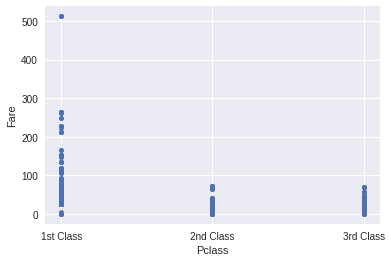

In [14]:
# Obviously We can guess fare is related to passenger class
# from scatter Plot we can see only first class have very high fare
titanic_df.plot.scatter(x='Pclass',y='Fare')
plt.xticks([1,2,3],['1st Class','2nd Class','3rd Class'])

# We calculate their correlation to confirm
titanic_df[['Fare', 'Pclass']].corr(method='spearman')

## Analyze about fare
At first, we can find there are some people with very high fare, and we clear them out for a fair analysis.  
Then from bar chart, we can find people survived have higher mean fare than people not survived.  

We can do t-test to confirm this.  
From T-test, p value is so small that we can confidently say people survied and not survied have different fare.  
And more, **people survived have higher fare than people not survived.**

However, normally only a man with high class can afford a high fare.
So when we calculate the correlation between Fare and Pclass, there are actually some relation between them.  
**People with lower class have lower fare**.  

One of the sad fact is, if we look at 2nd Class and 3rd Class passengers, we can find the fare they pay have no much difference. But we will know in the latter part, their survival rate have a very big difference, especially females and children. That's because this kind of class separation.

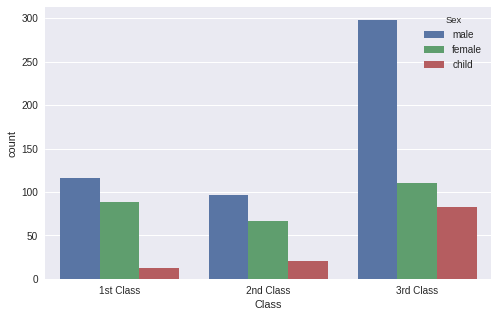

In [15]:
# To explore more details
# let's see sex distrubution in different classes
figure(figsize=(8,5))
sns.countplot(data=titanic_df,x='Class',hue='Sex',order=['1st Class','2nd Class','3rd Class'])

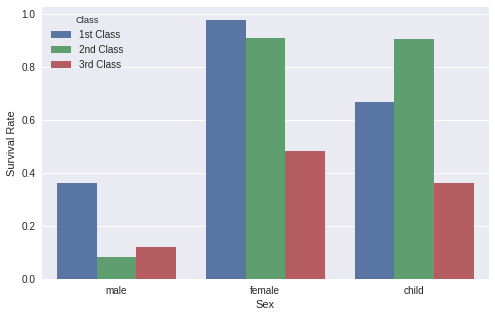

In [16]:
# From above we could see class 3 have large percent of men
# So we can guess the low survived rate of men is caused by class3 men
# the survive rate in higher class between sex may not very distinct

# Draw chart of different classes's survive rate detail
class_sex_group = titanic_df[['Sex','Class','Survived']].groupby(['Sex','Class'],as_index=False)
class_sex_survive_prec = class_sex_group.mean()

figure(figsize=(8,5))
fig = sns.barplot(data=class_sex_survive_prec, x='Sex',y='Survived',hue='Class', \
                  order=['male','female','child'])
fig.axes.set_ylabel('Survival Rate')

In [17]:
# Between class1 and class2 women they have similar survive rates
# Chi-Square test
# H0 = For Class1 and Class2 female, the survive rate and class is independent
female_class1_class2 = titanic_df[(titanic_df['Sex']=='female') \
                                  & ((titanic_df['Class']=='1st Class') \
                                     | (titanic_df['Class']=='2nd Class') )]

class_pivot = pd.pivot_table(data=female_class1_class2[['Survived','Class']],index='Survived',columns=['Class'],
                            aggfunc=len)
chi2, p_value, dof, expected = chi2_contingency(class_pivot)
print("Results of Chi-Squared test on Class to Survival on upper two classes female.")
print("Chi-Square Score = %s"%str(chi2))
print("Pvalue = %s\n"%str(p_value))

Results of Chi-Squared test on Class to Survival on upper two classes female.
Chi-Square Score = 2.31010987443
Pvalue = 0.128534964002



In [18]:
# Also between class1 and class2 child they have much similar survive rates
# Do test
child_class1_class2 = titanic_df[(titanic_df['Sex']=='child') \
                                  & ((titanic_df['Class']=='1st Class') \
                                     | (titanic_df['Class']=='2nd Class') )]

class_pivot = pd.pivot_table(data=child_class1_class2[['Survived','Class']],index='Survived',columns=['Class'],
                            aggfunc=len)
chi2, p_value, dof, expected = chi2_contingency(class_pivot)
print("Results of Chi-Squared test on Class to Survival on upper two classes child.")
print("Chi-Square Score = %s"%str(chi2))
print("Pvalue = %s\n"%str(p_value))

Results of Chi-Squared test on Class to Survival on upper two classes child.
Chi-Square Score = 1.52959656085
Pvalue = 0.21617300386



In [19]:
# And class2 and class3 male they also have similar survive rate
male_class2_class3 = titanic_df[(titanic_df['Sex']=='male') \
                                  & ((titanic_df['Class']=='3rd Class') \
                                     | (titanic_df['Class']=='2nd Class') )]

class_pivot = pd.pivot_table(data=male_class2_class3[['Survived','Class']],index='Survived',columns=['Class'],
                            aggfunc=len)
print("Results of Chi-Squared test on Class to Survival on lower two classes male.")
print("Chi-Square Score = %s"%str(chi2))
print("Pvalue = %s\n"%str(p_value))

Results of Chi-Squared test on Class to Survival on lower two classes male.
Chi-Square Score = 1.52959656085
Pvalue = 0.21617300386



## Analysis of class and sex detail
From chart, we can see **women is actually have higher survive rate than men, even in different classes.**  
And **1st class have higher survive rate for men, 3rd class children and women have lower survive rate.**  

However, when we test class 1 female and class 2 female, class 1 child and class 2 child, as well as class 2 male and class 3 male,    
we can't reject the hypothesis in high significance.  
So we can conclude even in the whole higher class have higher survive rate,  
**for women and children class 1 and class 2 have no much diffrerence;**  
**for male class 2 and class 3 have no much difference.**

## Summary
### First Question: Sex and Age factors with Survive rate
From this violin chart, we can see clearly the survived distribution of male, female, and child.  
![Figure 1](http://upload-images.jianshu.io/upload_images/4787675-0735a211713f2463.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
We can see the opposite condition of male and female, **most of the males died and most of the females lived**.  
For children, it is nearly half and half.  
We can look at more details at bar tables.
![Figure 2](http://upload-images.jianshu.io/upload_images/4787675-1f5587a91e18d8c9.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
It exactly shows female have higher survival rate than male and children have higher survival rate than non-children.  

We can also use statistical hypothesis test confirm this.
We use Chi-Square-test, get Chi-Square Score and pvalue. These actually reject null hypothesis, and confirm our hypothesis in a high significance. 

### Second Question: Class factor with Survive rate
As above, we show violin plot first.  
We can see most of the 1st class survived, most of 3rd class died, and nearly half of 2nd class survived.  
![Figure3](http://upload-images.jianshu.io/upload_images/4787675-aee0b30d3878980a.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
Then show people number of the three classes and respective survive rate.  
![Figure4](http://upload-images.jianshu.io/upload_images/4787675-fff2b05415b730e4.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
It seems higher class have higher survive rate, and 3rd class has most of the people, but lowest survive rate.  

Using Chi-Square-test analyse three class, It shows **Class actually relate to survive rate, especially between class 3 and upper classes**.

### Third Question: Fare fator with Survive rate
At first, show people distribution of different fares.
![Figure5](http://upload-images.jianshu.io/upload_images/4787675-949cd2809835146c.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
We can see there are some outliners pay a lot of fare.  
For fair, we clean them out, and plot mean fare for survive and non-survive groups.
![Figure6](http://upload-images.jianshu.io/upload_images/4787675-7f2431e3c6f618f7.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
It shows clearly **people survived with higher fare.**  
T-test also confirms our idea.

### Forth Question: When going to each class and each sex, above conclusions still work?
At first, plot bar chart for each sex and coordinate class.  
Some interesting things emerge out.  
![Figure7](http://upload-images.jianshu.io/upload_images/4787675-3246fc48cff7af1e.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
For male, its no longer higher class with higher survival rate, 
2nd class men even have lower survival rate than 3rd class men.  
For female and child, 1st class and 2nd class seems have similar survive rate.  

To confirm our observation, carry on Chi-Square-test between 1st and 2nd class female and child, and 2nd and 3rd class men.  
If we hold 99% significance, all the three null hypothesis can't be rejected.  
Therefore, what we conclude above don't work here.  

## Conclusion
1. **Women have higher survival rate than men and children, no matter whole people or separate classes.**  
2. **Children have higher survival rate than whole adult group.**  
3. **From the whole view, higher class has higher survival rate.**  
4. **Survived people have higher price of their fares.**  
5. **If we look at details, some of above conclusions fail.**  
  1. **For 1st and 2nd classes, women and children have similar survival rate.**
  2. **For 2nd and 3rd classes, men have similar survival rate.**

## Reference

1. [Kaggle: Titanic variable descriptions](https://www.kaggle.com/c/titanic/data)
2. [Wikipedia: Titanic sinking details](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic)
3. [The design of Titanic](http://www.ultimatetitanic.com/design/#.WDl3Et8xA8o)
4. [Suites and cabins for passengers on the Titanic](http://www.dummies.com/education/history/suites-and-cabins-for-passengers-on-the-titanic/)
5. [Pandas documents](http://pandas.pydata.org/pandas-docs/stable/index.html)
6. [Room allocation in Titanic](http://www.dummies.com/education/history/titanic-facts-the-layout-of-the-ship/)
7. [Ticket price for different class](http://www.dummies.com/education/history/suites-and-cabins-for-passengers-on-the-titanic/)
8. [Advanced Functionality in Seabron](http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/)
9. [Panda dataframe add colums](http://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas)
10. [Udacity Inferential Statistics](https://classroom.udacity.com/courses/ud201)
11. [Kaggle a journey through titanic notebook](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/notebook)
12. [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
13. [How to deal with SettingWithCopyWarning in Pandas?](http://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas)
14. [What statistical analysis should I use?](http://www.ats.ucla.edu/stat/stata/whatstat/whatstat.htm)
15. [Seaborn Documents](http://seaborn.pydata.org/index.html)
16. [Scipy stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
17. [Matplotlib figure document](http://matplotlib.org/api/figure_api.html)
18. [Pandas dataframe add a field based on multiple if statements](http://stackoverflow.com/questions/21733893/pandas-dataframe-add-a-field-based-on-multiple-if-statements)
19. [Correlation(Pearson, Kendall, Spearman)](http://www.statisticssolutions.com/correlation-pearson-kendall-spearman/)